In [0]:
# import the necessary packages
import numpy as np # np is an alias pointing to numpy library
from urllib.request import urlopen
import cv2 # Importing OpenCV
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

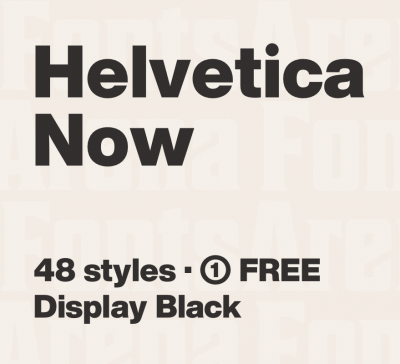

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image) # Display the resulting image

In [0]:
edges = cv2.Canny(image,100,200) # Extraction of edges using Canny filter

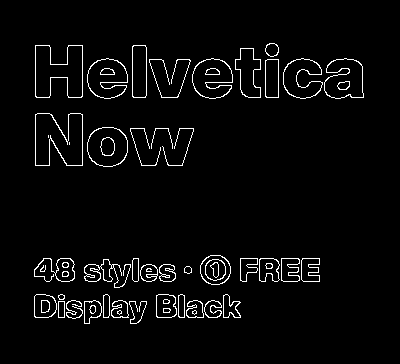

In [0]:
cv2_imshow(edges)  #Display the edges found using Canny filter

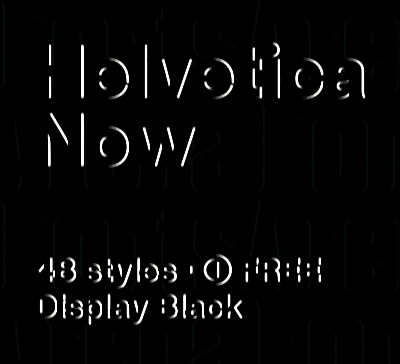

In [0]:
# Vertical Edge Detector
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

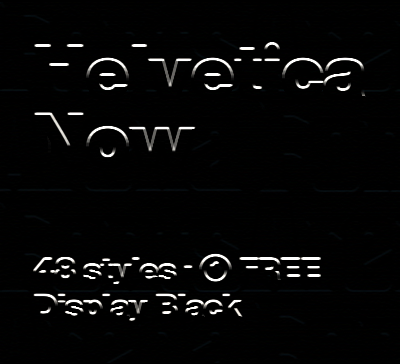

In [0]:
# Horizontal Edge Detector
# The Sobel Operator uses two kernels (one for each direction):
# We compute the convolution between the image (converted in black and white) and the two kernels separately.

kernel_horz = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])  #Filter/Kernel values got from theory
dst_horz = cv2.filter2D(image,-1,kernel_horz) # filter2D Convolves the input image with the kernel.
#filter2D (input image, depth of output image, kernel )
# desired depth of the destination/output image - if it is negative, it will be the same
cv2_imshow(dst_horz)


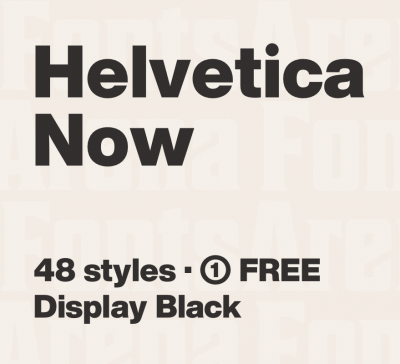

In [0]:
#Identity function (doesn't do anything)
kernel_identity = np.float32([[0, 0, 0] ,[0, 1, 0] ,[0, 0, 0]])
dst_idn = cv2.filter2D(image,-1,kernel_identity)
cv2_imshow(dst_idn)

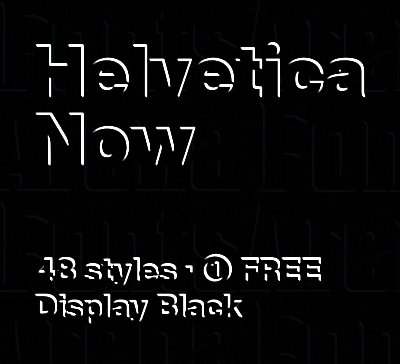

In [0]:
#45 Degree Angle Detector
kernel_45deg = np.float32([[0,1,2],[-1,0,1],[-2,-1,0]])
dst_45deg = cv2.filter2D(image,-1,kernel_45deg)
cv2_imshow(dst_45deg)


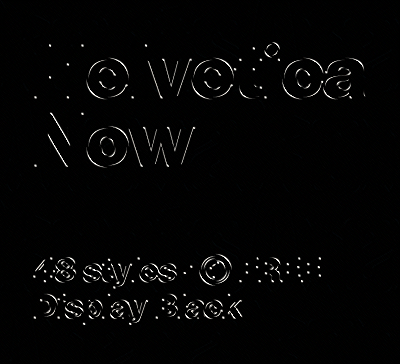

In [0]:
#135 Degree Angle Detector
kernel_135deg = np.float32([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
dst_135deg = cv2.filter2D(image,-1,kernel_135deg)
cv2_imshow(dst_135deg)

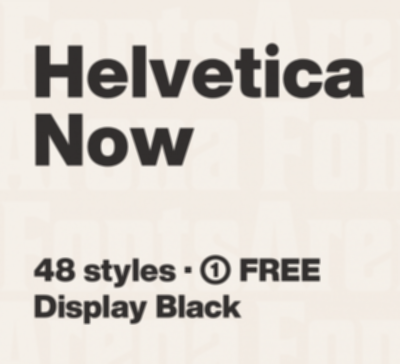

In [0]:
# Blur Kernel
# The Box Blur kernel is used. Each pixel is computed as the average of the surrounding pixels.
kernel_blur = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
dst_blur = cv2.filter2D(image,-1,kernel_blur)
cv2_imshow(dst_blur)

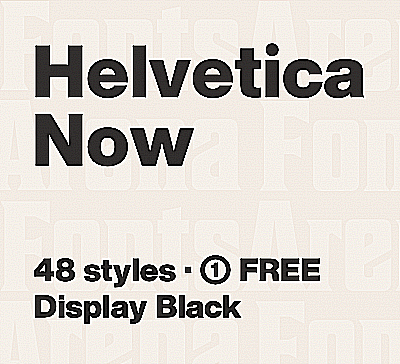

In [0]:
# Sharpen Kernel
# The details of an image can be emphasized by using a high-pass filter:
# In this kernel, the pixel is boosted when the neighbor pixels are different.
kernel_sharpen = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
dst_sharpen = cv2.filter2D(image,-1,kernel_sharpen) 
cv2_imshow(dst_sharpen)